In [6]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.3 MB/s eta 0:00:00


Importing required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import shap

Importing and viewing dataset

In [8]:
data = pd.read_csv("/content/drive/MyDrive/TTJ/Project/dataset.csv")

In [9]:
data

,ID,Attrition_Flag,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,358999029,Existing Customer,19,M,0.0,Graduate,Single,Less than $40K,Blue,13,...,4,2,2843.50,2019,566.0,0.525,2644,40,0.481,0.781
1,389722554,Existing Customer,19,M,0.0,Graduate,Single,$40K - $60K,Blue,13,...,1,2,3619.00,1616,1674.0,0.466,2781,54,0.350,0.491
2,357247629,Existing Customer,19,M,0.0,College,Single,Less than $40K,Blue,36,...,1,3,1582.13,479,959.3,0.553,1786,37,0.370,0.333
3,378032716,Existing Customer,19,M,0.0,NaN,Single,$40K - $60K,Green,19,...,3,2,2405.70,1597,590.0,0.777,2560,46,0.314,0.730
4,406734729,Existing Customer,19,F,1.0,Graduate,Single,$40K - $60K,Blue,20,...,4,3,1582.13,673,765.3,0.595,2167,48,0.412,0.468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,393674304,Existing Customer,54,M,0.0,High School,Married,Less than $40K,Blue,56,...,3,3,3577.20,1495,1757.0,0.581,1227,15,0.875,0.460
10123,357976441,Existing Customer,54,M,0.0,High School,Married,$40K - $60K,Blue,36,...,4,2,4915.90,1125,3344.0,1.363,1765,34,1.615,0.252
10124,357716304,Existing Customer,0,M,4.0,NaN,Single,$60K - $80K,Blue,36,...,1,0,24554.20,953,21369.0,0.769,1348,34,1.125,0.043
10125,386686554,Existing Customer,0,F,4.0,High School,Married,Less than $40K,Blue,43,...,3,0,3108.60,2070,756.0,0.541,1025,28,0.647,0.732


In [10]:
pd.set_option('display.max_columns', None)
data.head()

,ID,Attrition_Flag,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,358999029,Existing Customer,19,M,0.0,Graduate,Single,Less than $40K,Blue,13,6,4,2,2843.50,2019,566.0,0.525,2644,40,0.481,0.781
1,389722554,Existing Customer,19,M,0.0,Graduate,Single,$40K - $60K,Blue,13,6,1,2,3619.00,1616,1674.0,0.466,2781,54,0.350,0.491
2,357247629,Existing Customer,19,M,0.0,College,Single,Less than $40K,Blue,36,4,1,3,1582.13,479,959.3,0.553,1786,37,0.370,0.333
3,378032716,Existing Customer,19,M,0.0,NaN,Single,$40K - $60K,Green,19,5,3,2,2405.70,1597,590.0,0.777,2560,46,0.314,0.730
4,406734729,Existing Customer,19,F,1.0,Graduate,Single,$40K - $60K,Blue,20,6,4,3,1582.13,673,765.3,0.595,2167,48,0.412,0.468


In [11]:
data.columns

Index(['ID', 'Attrition_Flag', 'Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Used_Bal',
       'Total_Unused_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Age                       10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10122 non-null  float64
 5   Education_Level           8607 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           9013 non-null   object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Mapping target categorical variable "Attrition_flag" -> we want to predict the number of customers who will churn -> "Attrited Customer" = 1

In [13]:
data['Attrition_Flag'].isnull().sum()

0

In [14]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [15]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})

In [16]:
data['Attrition_Flag']

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

Getting the column names for categorical variables to map them as well:

In [17]:
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

In [18]:
categorical_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

Inputting null values:

In [19]:
data.isnull().sum()

ID                             0
Attrition_Flag                 0
Age                            0
Gender                         0
Dependent_count                5
Education_Level             1520
Marital_Status               749
Income_Category             1114
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Used_Bal                 0
Total_Unused_Bal               0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [20]:
data['Dependent_count']

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
10122    0.0
10123    0.0
10124    4.0
10125    4.0
10126    1.0
Name: Dependent_count, Length: 10127, dtype: float64

Inputting missing values for Dependent_count with the median, as we are dealing with an integer data type

In [21]:
data['Dependent_count'] = data['Dependent_count'].fillna(data['Dependent_count'].median())

For education level, as it's a categorical variable, and assigning no education level to the random missing values would be unrealistic, I have chosen to input missing values using the mode

In [22]:
data['Education_Level'].value_counts()

Education_Level
Graduate         3128
High School      2012
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [23]:
data['Education_Level'] = data["Education_Level"].fillna("Graduate")

In [24]:
data["Education_Level"].mode()

0    Graduate
Name: Education_Level, dtype: object

The same will be done for the missing categorical variable "Marital_Status"

In [25]:
data['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64

In [26]:
data['Marital_Status'] = data['Marital_Status'].fillna("Married")

In [27]:
data["Marital_Status"].mode()

0    Married
Name: Marital_Status, dtype: object

In [28]:
data['Income_Category'].value_counts() / len(data) * 100

Income_Category
Less than $40K    35.153550
$40K - $60K       17.665646
$80K - $120K      15.157500
$60K - $80K       13.844179
$120K +            7.178829
Name: count, dtype: float64

No income value could mean that the customer has no income, thus the correct category would be "Less than $40k"

In [29]:
data['Income_Category'] = data['Income_Category'].fillna("Less than $40K")

In [30]:
data['Income_Category'].mode()

0    Less than $40K
Name: Income_Category, dtype: object

In [31]:
data.isnull().sum()

ID                          0
Attrition_Flag              0
Age                         0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Used_Bal              0
Total_Unused_Bal            0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Replacing other card categories than "Blue" with "Other", as "Blue" holds 93% of values

In [32]:
data['Card_Category'].value_counts()/len(data) * 100

Card_Category
Blue        93.097660
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Green        0.069122
Purple       0.009875
Name: count, dtype: float64

In [33]:
values = data['Card_Category'].value_counts()/len(data) * 100
values.index[1:]

Index(['Silver', 'Gold', 'Platinum', 'Green', 'Purple'], dtype='object', name='Card_Category')

In [34]:
data['Card_Category'] = np.where(data['Card_Category'].isin(values.index[1:]), 'Other', data['Card_Category'])

In [35]:
data['Card_Category'].value_counts()/len(data) * 100

Card_Category
Blue     93.09766
Other     6.90234
Name: count, dtype: float64

In [36]:
data.describe(include=['object'])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127
unique,2,6,3,5,2
top,F,Graduate,Married,Less than $40K,Blue
freq,5358,4648,5436,4674,9428


We are not going to remove any categorical columns, as we do not have any with too many or too few unique values

Mapping the categorical variables to dummy 1/0 variables:

In [37]:
numerical_features = [col for col in data if data[col].dtypes != 'object' and col != 'Attrition_Flag' and col != 'ID']

The numerical features all look relevant, so I will not remove any of the numerical columns

In [38]:
data[numerical_features]

,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,19,0.0,13,6,4,2,2843.50,2019,566.0,0.525,2644,40,0.481,0.781
1,19,0.0,13,6,1,2,3619.00,1616,1674.0,0.466,2781,54,0.350,0.491
2,19,0.0,36,4,1,3,1582.13,479,959.3,0.553,1786,37,0.370,0.333
3,19,0.0,19,5,3,2,2405.70,1597,590.0,0.777,2560,46,0.314,0.730
4,19,1.0,20,6,4,3,1582.13,673,765.3,0.595,2167,48,0.412,0.468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,54,0.0,56,3,3,3,3577.20,1495,1757.0,0.581,1227,15,0.875,0.460
10123,54,0.0,36,5,4,2,4915.90,1125,3344.0,1.363,1765,34,1.615,0.252
10124,0,4.0,36,4,1,0,24554.20,953,21369.0,0.769,1348,34,1.125,0.043
10125,0,4.0,43,4,3,0,3108.60,2070,756.0,0.541,1025,28,0.647,0.732


In [39]:
data = pd.get_dummies(data, columns=categorical_features)

In [40]:
data.head()

,ID,Attrition_Flag,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Used_Bal,Total_Unused_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Other
0,358999029,0,19,0.0,13,6,4,2,2843.50,2019,566.0,0.525,2644,40,0.481,0.781,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False
1,389722554,0,19,0.0,13,6,1,2,3619.00,1616,1674.0,0.466,2781,54,0.350,0.491,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False
2,357247629,0,19,0.0,36,4,1,3,1582.13,479,959.3,0.553,1786,37,0.370,0.333,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
3,378032716,0,19,0.0,19,5,3,2,2405.70,1597,590.0,0.777,2560,46,0.314,0.730,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True
4,406734729,0,19,1.0,20,6,4,3,1582.13,673,765.3,0.595,2167,48,0.412,0.468,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False


Dropping redundant columns:

In [41]:
columns_to_drop = ['Card_Category_Other', 'Gender_F']

Finding and capping variables heavily affected by outliers:

In [42]:
def find_outliers(dataframe, column, multiplier):
  q1 = dataframe[column].quantile(0.25)
  q3 = dataframe[column].quantile(0.75)
  iqr = q3 - q1
  lower_limit = q1 - multiplier * iqr
  upper_limit = q3 + multiplier * iqr
  outliers = dataframe[(dataframe[column] < lower_limit) | (dataframe[column] > upper_limit)]
  return len(outliers)

In [43]:
def censoring_outliers(dataframe, column, multiplier): #capping
  q1 = dataframe[column].quantile(0.25)
  q3 = dataframe[column].quantile(0.75)
  iqr = q3 - q1
  lower_limit = q1 - multiplier * iqr
  upper_limit = q3 + multiplier * iqr
  dataframe[column] = np.where(dataframe[column]<lower_limit, lower_limit,
                               np.where(dataframe[column] > upper_limit, upper_limit,
                                        dataframe[column])
                               )

In [44]:
columns_with_outliers = [col for col in numerical_features if find_outliers(data, col, 3) != 0]
columns_with_outliers

['Age',
 'Months_Inactive_12_mon',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Ct_Chng_Q4_Q1']

Plotting the box and violin plots for variables with outliers to identify heavily affected variables:

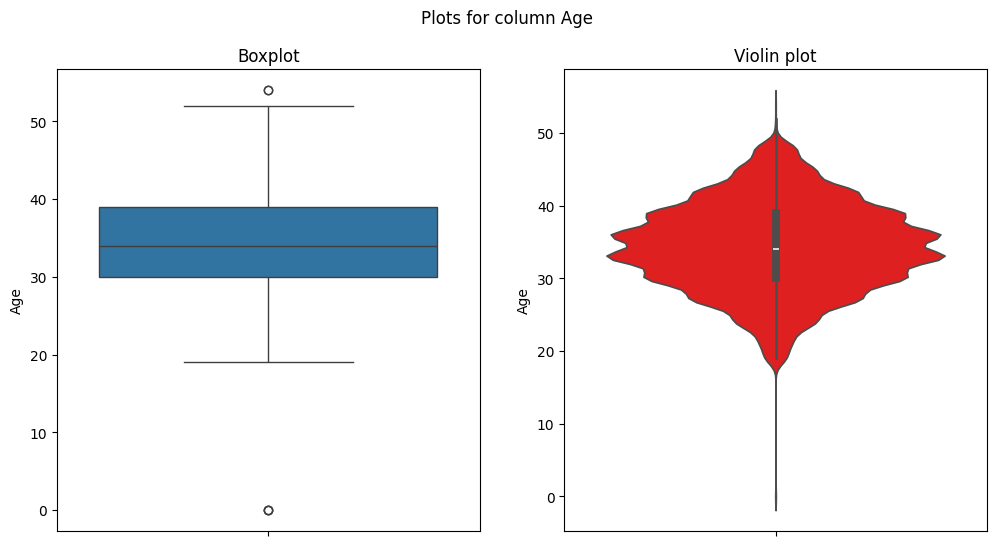

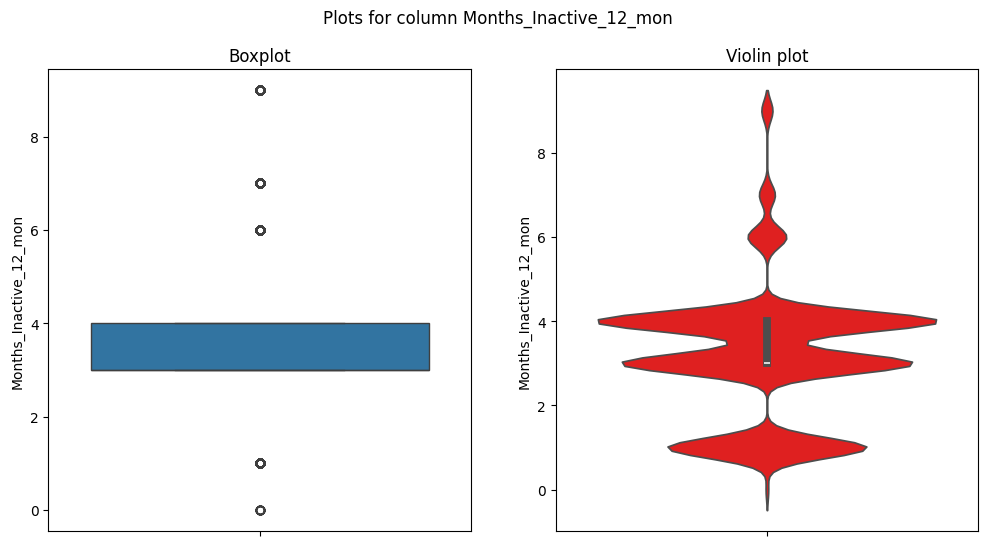

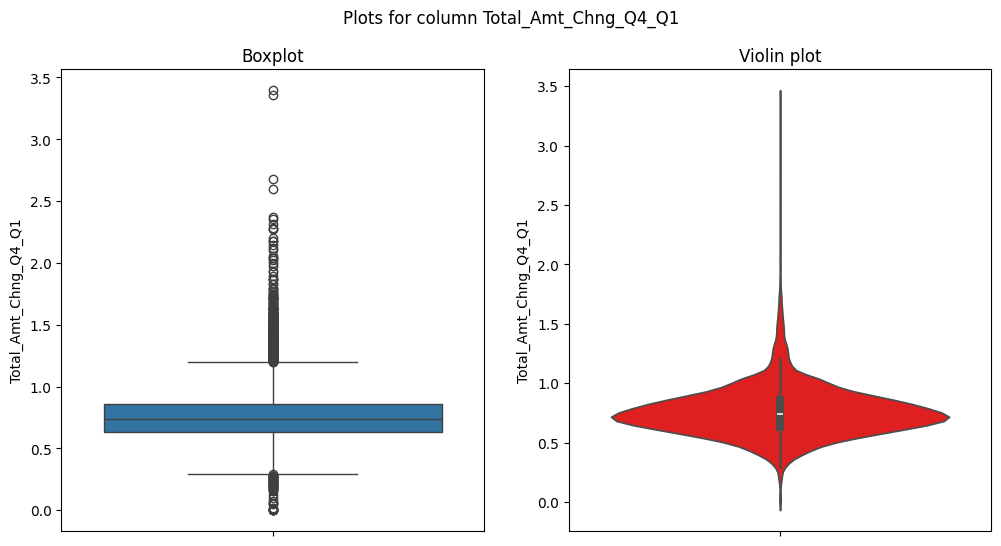

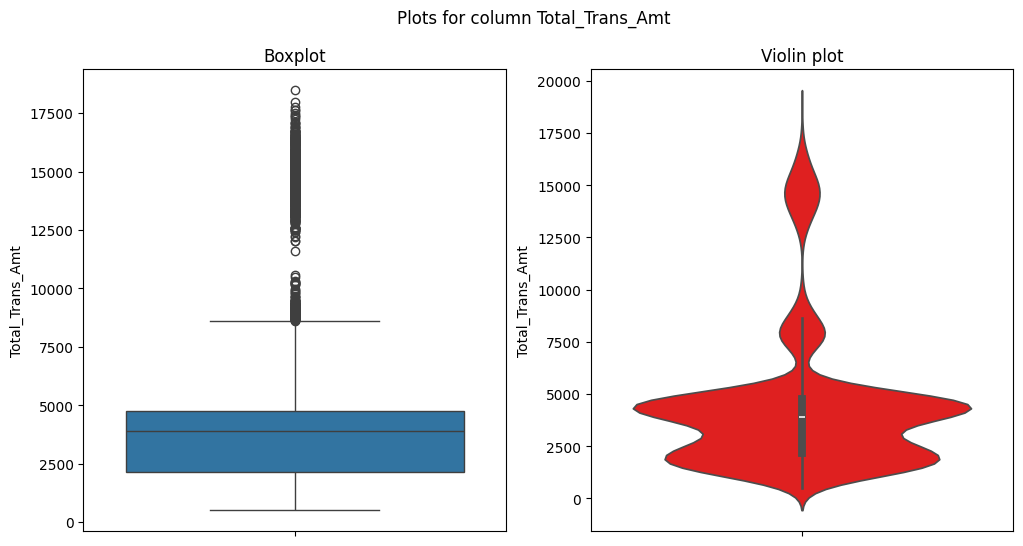

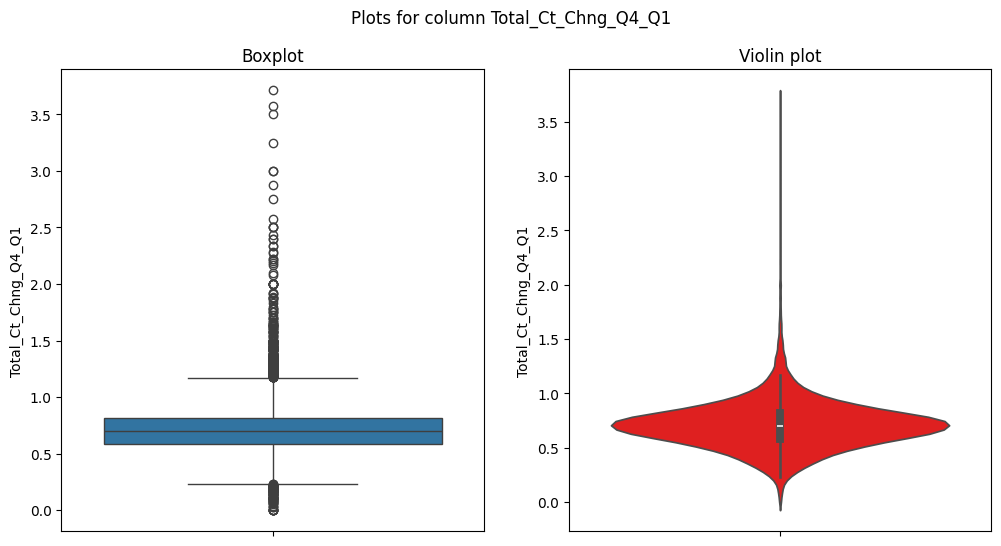

In [45]:
for col in columns_with_outliers:
  f,ax=plt.subplots(figsize=(12,6), nrows=1, ncols=2)
  plt.suptitle('Plots for column '+str(col))

  sns.boxplot(y=data[col], ax=ax[0])
  ax[0].set_title('Boxplot')

  sns.violinplot(y=data[col], ax=ax[1], color='red')
  ax[1].set_title('Violin plot')

  plt.show()

In [46]:
heavy_affected_variables = ['Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']

In [47]:
for var in heavy_affected_variables:
  censoring_outliers(data, var, 3)

We cannot observe any duplicate variables, not removing any:

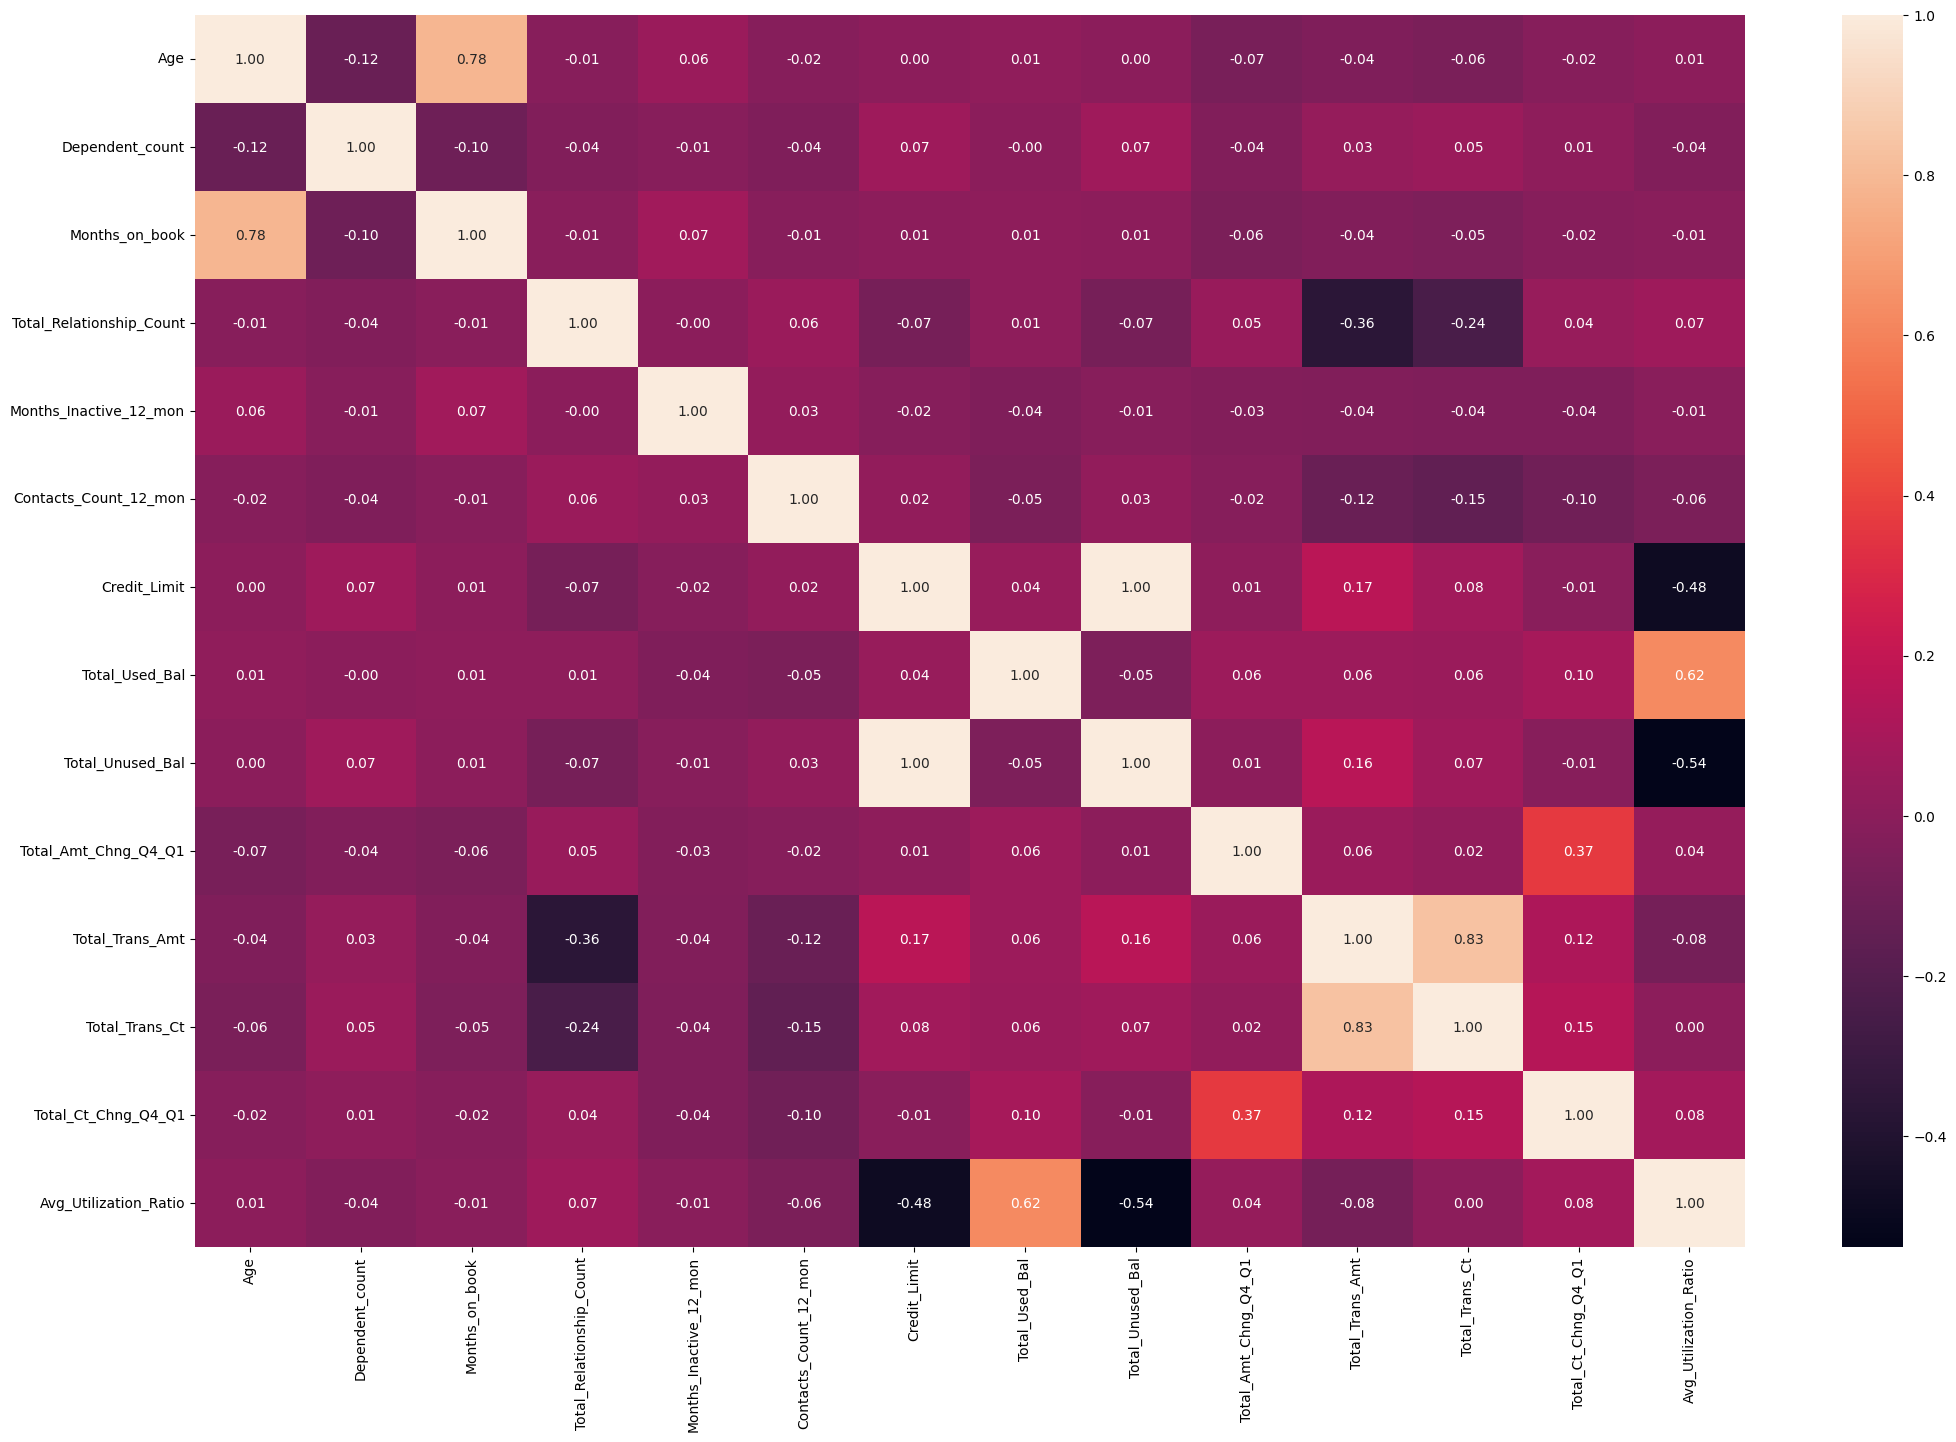

In [48]:
correlation = data[numerical_features].corr()
plt.subplots(figsize=(25,16))
sns.heatmap(correlation,annot=True,fmt='.2f')
plt.show()

In [49]:
data = data.drop(columns=columns_to_drop)

Splitting the dataset into explicative variable and variables to be explained (X and Y)

In [50]:
X = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag']

In [51]:
X = X.drop(columns=['ID']) #not explicative

Splitting the dataset again for training and testing the model (20% for test, 80% for train)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5) #random state for replicability

In [53]:
rf = RandomForestClassifier(max_depth = 7, n_estimators=500, n_jobs=-1)

Training the random forest model with our data:

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=500, n_jobs=-1)

Testing the model:

In [55]:
y_predict = rf.predict(X_test)

In [56]:
y_predict_train = rf.predict(X_train)

In [57]:
cm = confusion_matrix(y_test, y_predict)

Confusion matrix:

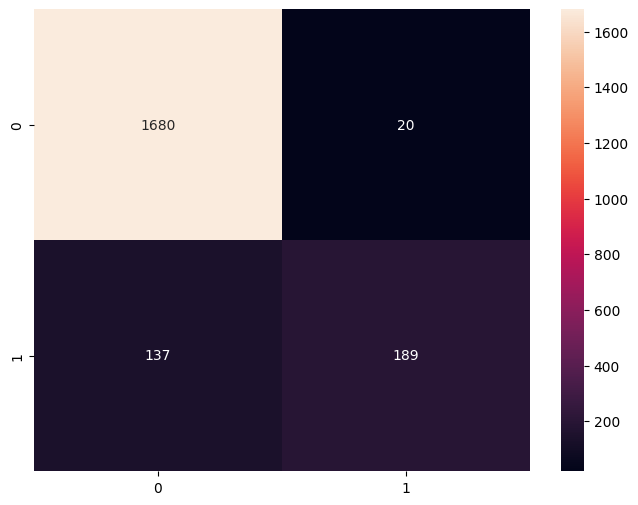

In [58]:
fig,ax = plt.subplots(figsize = (8,6))
sns.heatmap(cm,annot=True,fmt='d') #fmt = format, d = decimal
plt.show()

In [59]:
accuracy_test = accuracy_score(y_test, y_predict)
precision_test = precision_score(y_test, y_predict)
recall_test = recall_score(y_test, y_predict)

In [60]:
print('Accuracy for test is:',accuracy_test)
print('Precision for test is:',precision_test)
print('Recall for test is:',recall_test)

Accuracy for test is: 0.922507403751234
Precision for test is: 0.9043062200956937
Recall for test is: 0.5797546012269938


In [61]:
roc_auc_test = roc_auc_score(y_test, y_predict)
print('AUC for test is:',roc_auc_test)

AUC for test is: 0.7839949476723205


In [62]:
accuracy_train = accuracy_score(y_train, y_predict_train)
precision_train = precision_score(y_train, y_predict_train)
recall_train = recall_score(y_train, y_predict_train)

In [63]:
print('Accuracy for train is:',accuracy_train)
print('Precision for train is:',precision_train)
print('Recall for train is:',recall_train)

Accuracy for train is: 0.9437106530058017
Precision for train is: 0.9461457233368532
Recall for train is: 0.6887009992313605


In [64]:
roc_auc_train = roc_auc_score(y_train, y_predict_train)
print('AUC for train is:',roc_auc_train)

AUC for train is: 0.8406004996156803


We got a bad recall score, but good accuracy, precision and ROC AUC scores, we can fine tune the model to yield even better results. We can observe a slight overfit

Inputting our data into the LGBM model as well:

In [65]:
lgbm = LGBMClassifier(max_depth=7,n_estimators=500,learning_rate=0.1, n_jobs=-1, verbose=-1, random_state = 5)

In [66]:
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=7, n_estimators=500, n_jobs=-1, random_state=5,
               verbose=-1)

Testing the model:

In [67]:
y_predict_lgbm = lgbm.predict(X_test)
y_predict_train_lgbm = lgbm.predict(X_train)

In [68]:
cm_lgbm = confusion_matrix(y_test, y_predict_lgbm)

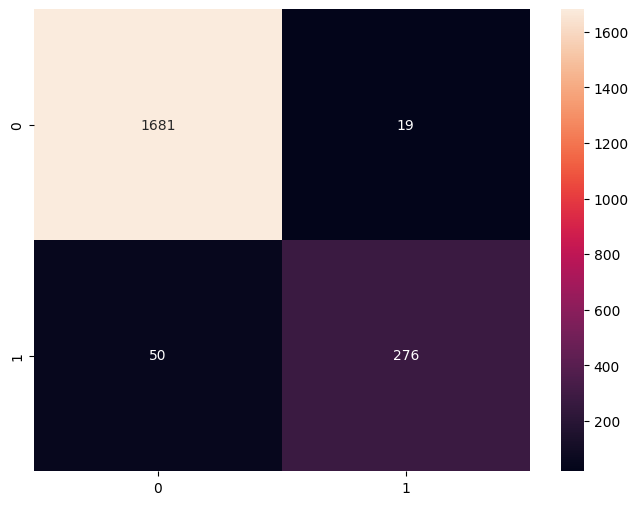

In [69]:
fig,ax = plt.subplots(figsize = (8,6))
sns.heatmap(cm_lgbm,annot=True,fmt='d') #fmt = format, d = decimal
plt.show()

In [70]:
accuracy_test_lgbm = accuracy_score(y_test, y_predict_lgbm)
precision_test_lgbm = precision_score(y_test, y_predict_lgbm)
recall_test_lgbm = recall_score(y_test, y_predict_lgbm)

In [71]:
print('Accuracy for test is:',accuracy_test_lgbm)
print('Precision for test is:',precision_test_lgbm)
print('Recall for test is:',recall_test_lgbm)

Accuracy for test is: 0.9659427443237907
Precision for test is: 0.9355932203389831
Recall for test is: 0.8466257668711656


In [72]:
roc_auc_test_lgbm = roc_auc_score(y_test, y_predict_lgbm)

In [73]:
print('ROC-AUC score for test is:', roc_auc_test_lgbm)

ROC-AUC score for test is: 0.9177246481414651


In [74]:
accuracy_train_lgbm = accuracy_score(y_train, y_predict_train_lgbm)
precision_train_lgbm = precision_score(y_train, y_predict_train_lgbm)
recall_train_lgbm = recall_score(y_train, y_predict_train_lgbm)

In [75]:
print('Accuracy for train is:',accuracy_train_lgbm)
print('Precision for train is:',precision_train_lgbm)
print('Recall for train is:',recall_train_lgbm)

Accuracy for train is: 1.0
Precision for train is: 1.0
Recall for train is: 1.0


In [76]:
roc_auc_train_lgbm = roc_auc_score(y_train, y_predict_train_lgbm)

In [77]:
print('ROC-AUC score for train is', roc_auc_train_lgbm)

ROC-AUC score for train is 1.0


We are getting a lot better results using LightGBM, with a ROC-AUC score of 0.91 for the test, and of 1.0 for the training dataset, this may indicate the fact that one of the existing variables already predicts churning chance very accurately

We will proceed to fine-tune the LightGBM model and use it to calculate a propensity model (probabilities)

In [78]:
y_predict_prob_lgbm = lgbm.predict_proba(X_test)

In [79]:
y_predict_prob_train_lgbm = lgbm.predict_proba(X_train)

In [80]:
y_predict_prob_lgbm = y_predict_prob_lgbm[:,1]
y_predict_prob_train_lgbm = y_predict_prob_train_lgbm[:,1] #keeping only the probabilites that the clients leave

In [81]:
roc_auc_test_prob_lgbm = roc_auc_score(y_test, y_predict_prob_lgbm)
roc_auc_train_prob_lgbm = roc_auc_score(y_train, y_predict_prob_train_lgbm)

In [82]:
print("ROC AUC Score for test (propensity model):",roc_auc_test_prob_lgbm)
print("ROC AUC Score for train (propensity model):",roc_auc_train_prob_lgbm)

ROC AUC Score for test (propensity model): 0.992708408516781
ROC AUC Score for train (propensity model): 1.0


The model doesn't appear to need any sort of fine-tuining

Displaying the individual feature importances within the model, these may or may not correspond to the SHAP values which will be computed later:

In [83]:
feature_importance = pd.DataFrame({"feature": X_train.columns, "Gain Importance": lgbm.feature_importances_})
feature_importance['% importance'] = feature_importance['Gain Importance'].values / feature_importance['Gain Importance'].values.sum() * 100
feature_importance

,feature,Gain Importance,% importance
0,Age,914,6.223614
1,Dependent_count,274,1.865722
2,Months_on_book,767,5.222661
3,Total_Relationship_Count,528,3.595261
4,Months_Inactive_12_mon,405,2.757728
5,Contacts_Count_12_mon,434,2.955195
6,Credit_Limit,836,5.692496
7,Total_Used_Bal,905,6.162331
8,Total_Unused_Bal,652,4.439602
9,Total_Amt_Chng_Q4_Q1,1741,11.854828


By plotting the Shapley graph, we get some insight into how the model works, the most important feature seems to be total transaction quantity: higher values mean the customer has a lower chance of churning, and lower values increase the churning chances

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


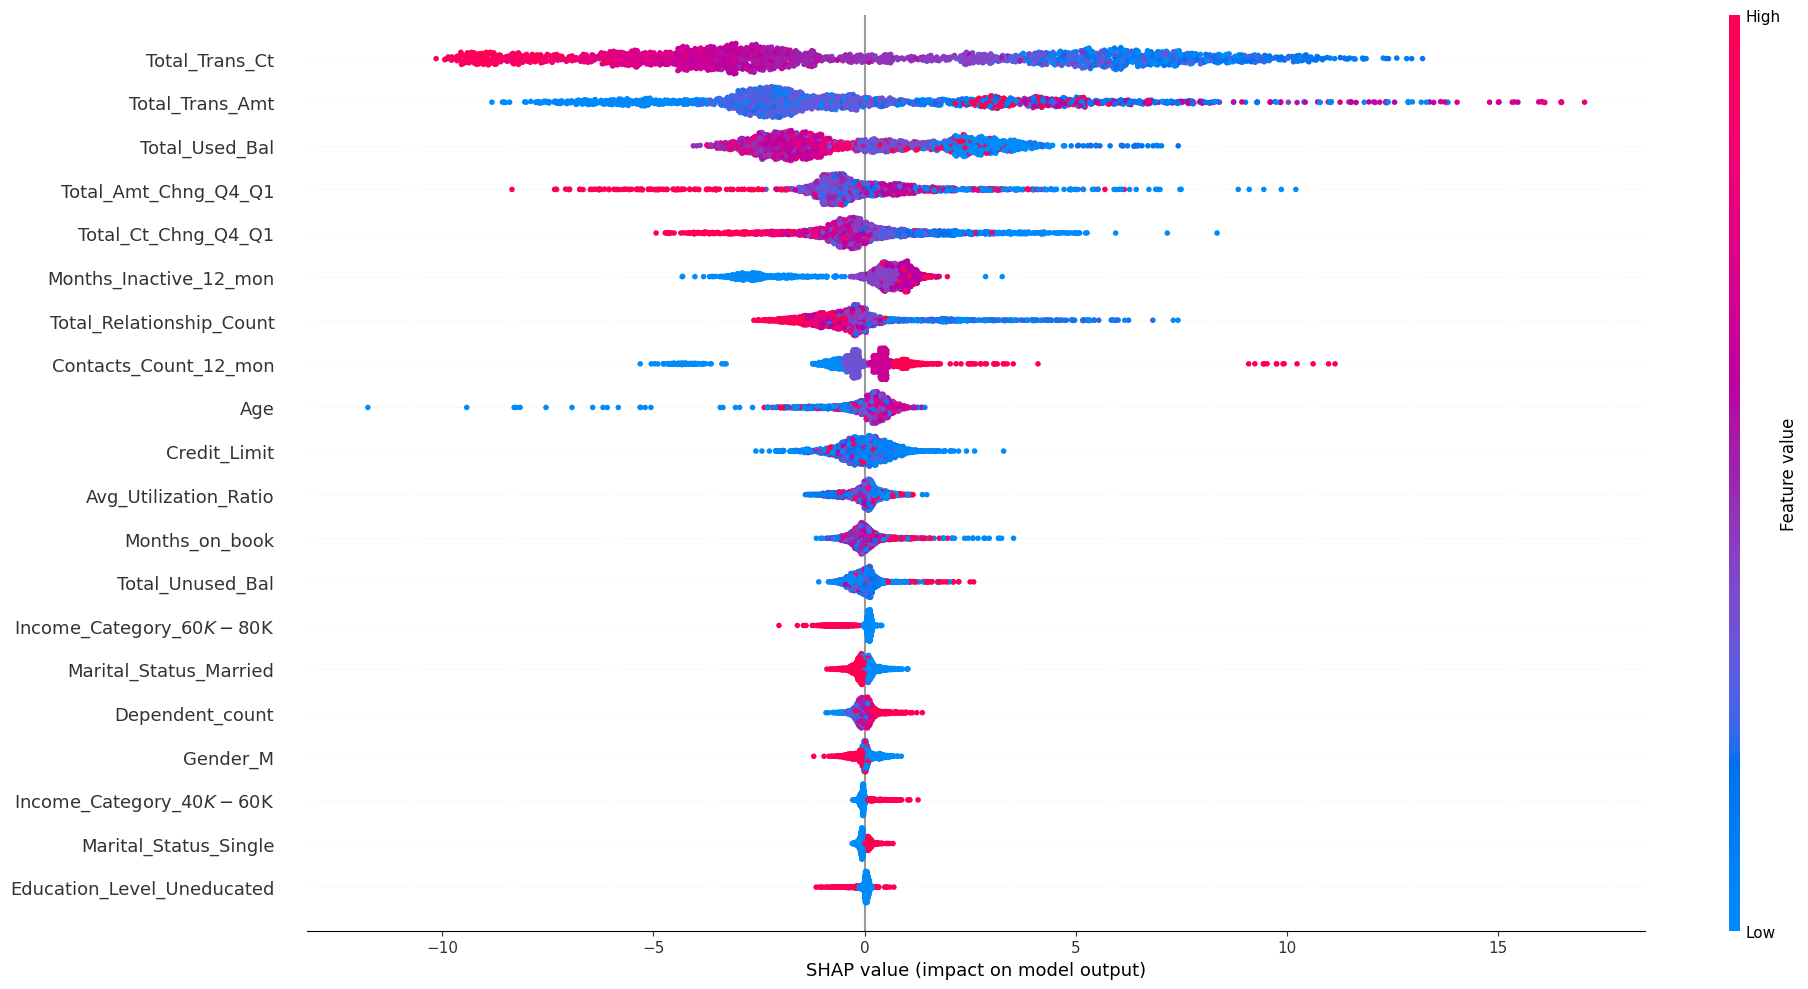

In [84]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_size=(20,10))

Client most likely to churn:

In [85]:
pr = pd.DataFrame()
pr['proba'] = y_predict_prob_lgbm
pr[pr['proba'] == pr['proba'].max()]

,proba
79,1.0


Local Shapley graph for the client most likely to churn (probability of 100%) - we can see the most important variables in this regard and their values: for example, a low Total_Trans_Ct value and a low Total_Amt_Chng_Q4_Q1 value singificantly impact the churning probability, pushing the graph to the left

In [86]:
index = 79
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index], link='logit') #predict for a client

Lift Gain report (performance metrics)

In [87]:
def create_gain_lift_report(y_test, y_predict_probs):
  lift_gain_report = pd.DataFrame()

  lift_gain_report['y_test'] = y_test
  lift_gain_report['Predicted Probabilities'] = y_predict_probs

  lift_gain_report = lift_gain_report.sort_values(by='Predicted Probabilities', ascending=False, ignore_index=True)

  lift_gain_report['Decile Group'] = pd.qcut(lift_gain_report['Predicted Probabilities'], q=10, labels=[10,9,8,7,6,5,4,3,2,1]) #q = nr of buckets, set labels so highest prob gets smallest decile
  lift_gain_report['Decile Group'] = pd.to_numeric(lift_gain_report['Decile Group'])

  lift_gain_report['Number of obs'] = 1
  lift_gain_report = lift_gain_report.groupby(['Decile Group']).sum().reset_index()

  lift_gain_report['Cumulative no of obs'] = lift_gain_report['Number of obs'].cumsum() #cumulative sum

  lift_gain_report['Cumulative % of obs'] = lift_gain_report['Cumulative no of obs'] / lift_gain_report['Cumulative no of obs'].max()

  lift_gain_report['Cumulative no of pos'] = lift_gain_report['y_test'].cumsum()

  lift_gain_report['Gain'] = lift_gain_report['Cumulative no of pos'] / lift_gain_report['Cumulative no of pos'].max()

  lift_gain_report['Lift'] = lift_gain_report['Gain'] / lift_gain_report['Cumulative % of obs']

  return lift_gain_report

lift_gain_report = create_gain_lift_report(y_test, y_predict_prob_lgbm)
lift_gain_report

,Decile Group,y_test,Predicted Probabilities,Number of obs,Cumulative no of obs,Cumulative % of obs,Cumulative no of pos,Gain,Lift
0,1,200,2.029778e+02,203,203,0.100197,200,0.613497,6.122881
1,2,115,9.298649e+01,202,405,0.199901,315,0.966258,4.833674
2,3,9,4.741514e-02,203,608,0.300099,324,0.993865,3.311794
3,4,2,7.651086e-04,202,810,0.399803,326,1.000000,2.501235
4,5,0,7.583287e-05,203,1013,0.500000,326,1.000000,2.000000
5,6,0,1.618367e-05,202,1215,0.599704,326,1.000000,1.667490
6,7,0,3.744388e-06,203,1418,0.699901,326,1.000000,1.428773
7,8,0,9.820975e-07,202,1620,0.799605,326,1.000000,1.250617
8,9,0,2.129909e-07,203,1823,0.899803,326,1.000000,1.111355
9,10,0,2.437782e-08,203,2026,1.000000,326,1.000000,1.000000


The lift plot showcases the efficiency increases we get by targeting each decile: for example, 4.93 gain at second decile means that, by targeting cases from the second decile, we can reach an efficiency 4.93 times higher comparing with a random selection. The graph shows large gain values for the first deciles, and low ones for the ones towards the tail, indicating large diminishing returns after around the 4th decile

[Text(0, 0, '6.12'),
 Text(0, 0, '4.83'),
 Text(0, 0, '3.31'),
 Text(0, 0, '2.5'),
 Text(0, 0, '2.0'),
 Text(0, 0, '1.67'),
 Text(0, 0, '1.43'),
 Text(0, 0, '1.25'),
 Text(0, 0, '1.11'),
 Text(0, 0, '1.0')]

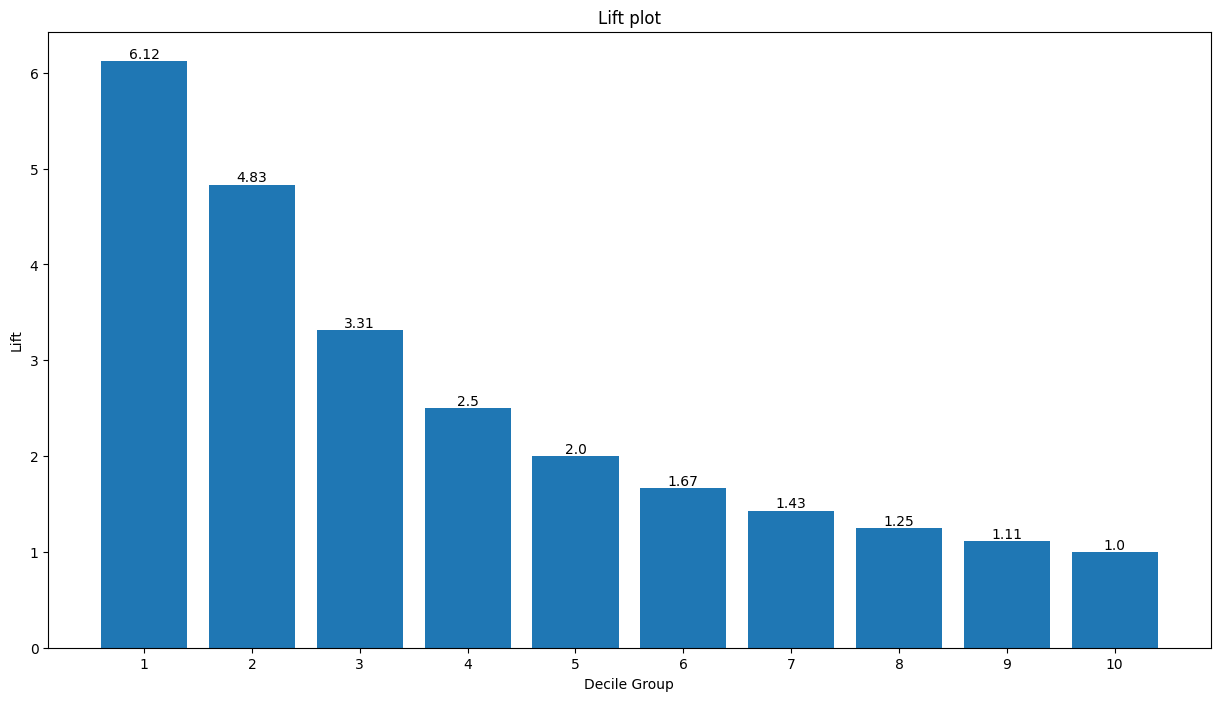

In [88]:
fig,ax = plt.subplots(figsize=(15,8))
barplot = ax.bar(lift_gain_report['Decile Group'], lift_gain_report['Lift'])
plt.title('Lift plot')
plt.xlabel('Decile Group')
plt.ylabel('Lift')
plt.xticks(lift_gain_report['Decile Group'])
ax.bar_label(barplot,labels=np.round(lift_gain_report['Lift'], 2).values, label_type='edge') #second arg - nr. of decimals

Visualising the gain values on a graph shows the added value the model can bring in a business context: for example, a gain value of 96% in the second decile, means that by selecting the top 20% most probable churners predicted by the model, we can reach 96% of total positives

([<matplotlib.axis.YTick at 0x7accbf98e380>,
 [Text(0, 0.61, '0.61'),
  Text(0, 0.97, '0.97'),
  Text(0, 0.99, '0.99'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.0, '1.00')])

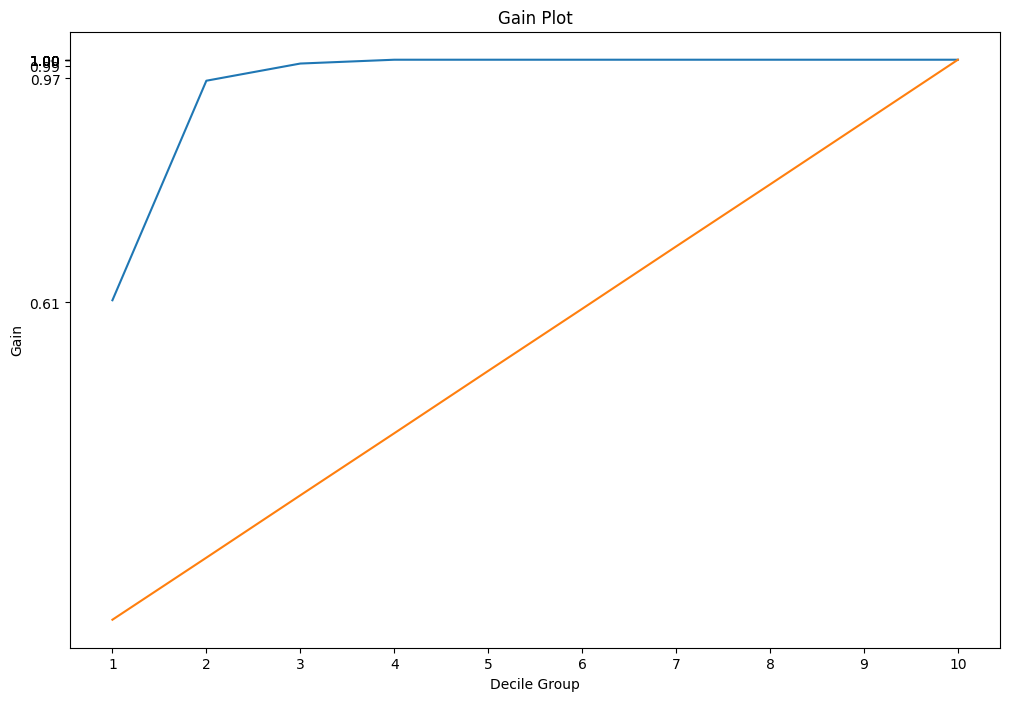

In [89]:
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(data = lift_gain_report, x = lift_gain_report['Decile Group'], y= lift_gain_report['Gain'])
sns.lineplot(data = lift_gain_report, x = lift_gain_report['Decile Group'], y = lift_gain_report['Cumulative % of obs'])
plt.title('Gain Plot')
plt.xticks(lift_gain_report['Decile Group'])
plt.yticks(round(lift_gain_report['Gain'], 2))